<a href="https://colab.research.google.com/github/Nils1511/ImageProcessing/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Enhancing the night photo by maniputing its histogram and reducing noise

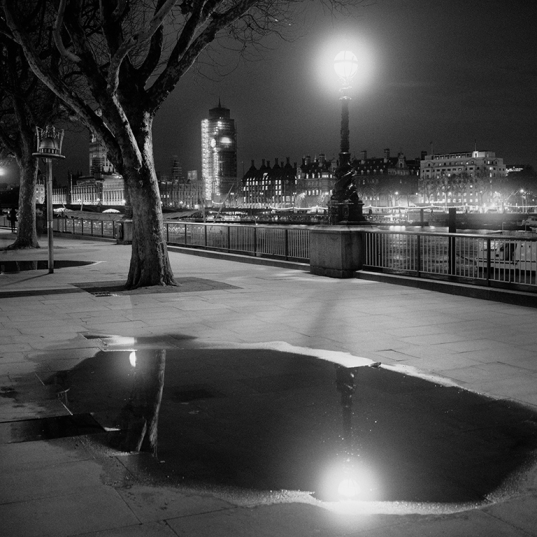

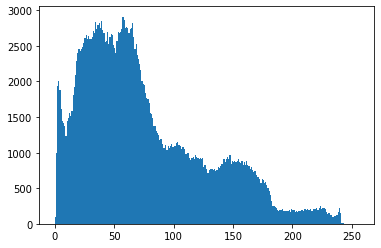

In [ ]:
img1 = cv2.imread("/content/gdrive/MyDrive/EE 610 /assignment 2/night.jpg",0)
scale_percent = 70 # percent of original size
width = int(img1.shape[1] * scale_percent / 100) # width scale
height = int(img1.shape[0] * scale_percent / 100) # height scale
dim = (width, height)

img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA) # resizing image
cv2_imshow(img1)
plt.hist(img1.ravel(),256,[0,256]);

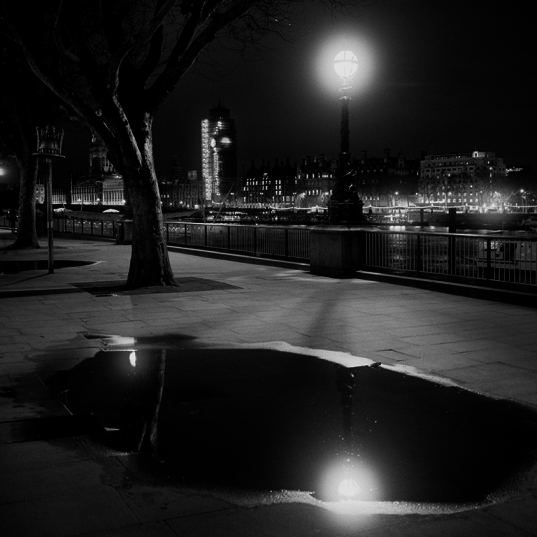

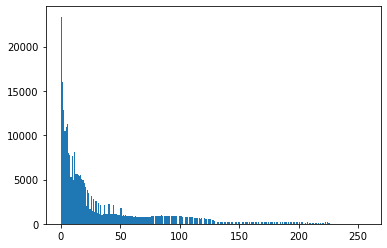

In [ ]:
# The lightness level of the img1 decreases 
im1 = 255.0*(img1/255.0)**2
cv2_imshow(im1)
plt.hist(im1.ravel(),256,[0,256]);

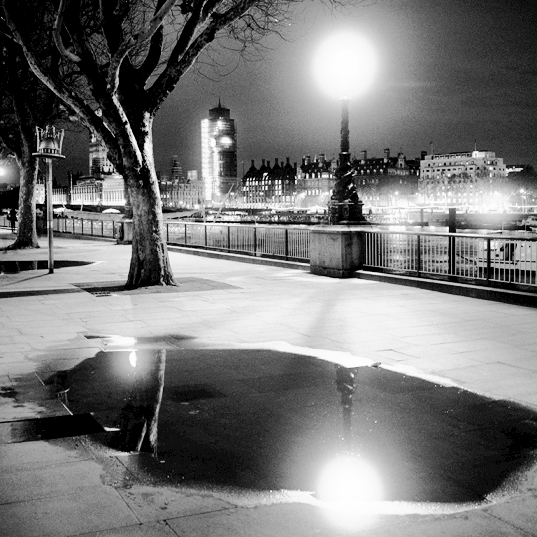

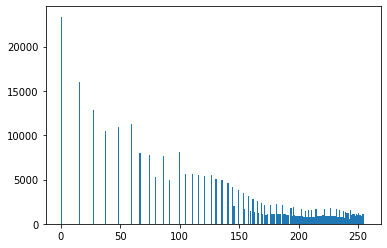

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im2 = histeq(im1)
cv2_imshow(im2)
plt.hist(im2.ravel(),256,[0,256]);

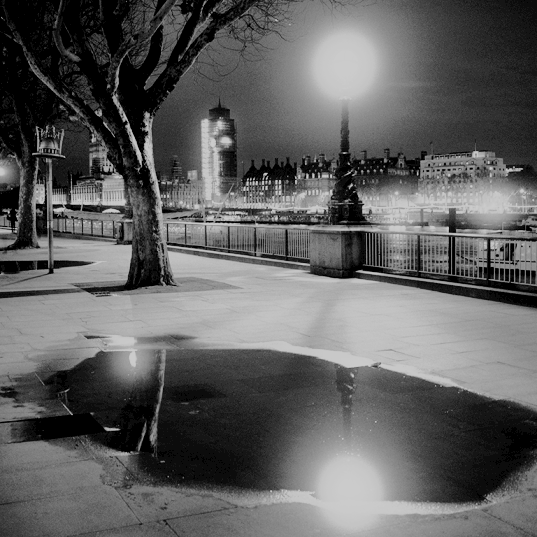

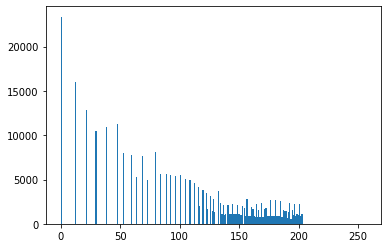

In [ ]:
#  the image by multiplying pixel values with 0.8
img2 = np.copy(im2*0.8);
cv2_imshow(img2)
plt.hist(img2.ravel(),256,[0,256]);

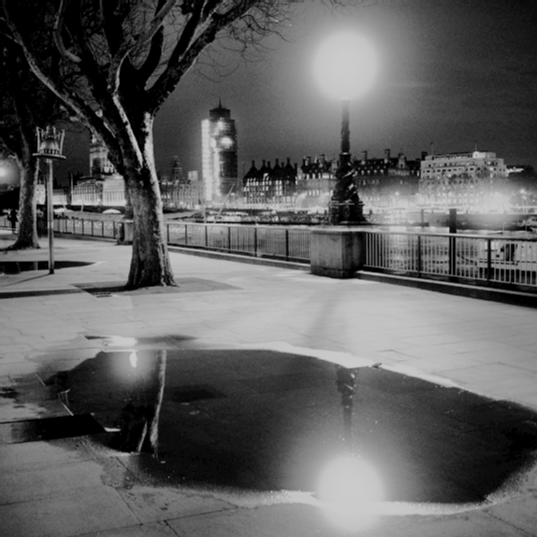

In [ ]:
img_1 = cv2.blur(img2, (2, 2))
cv2_imshow(img_1)

## Removing the newspaper-ink-dot effect and try to make image more natural looking

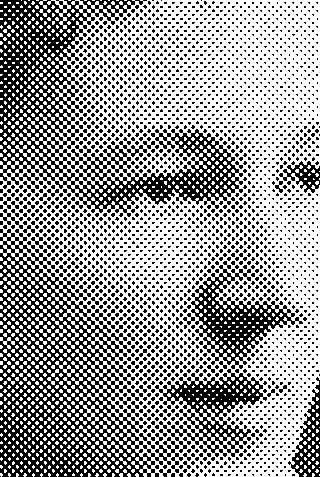

In [ ]:
img3 = cv2.imread("/content/gdrive/MyDrive/EE 610 /assignment 2/newspaper-dots.jpg",0)
cv2_imshow(img3)

In [ ]:
# def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
#     P, Q = shape
#     # Initialize filter with zeros
#     H = np.zeros((P, Q))

#     # Traverse through filter
#     for u in range(0, P):
#         for v in range(0, Q):
#             # Get euclidean distance from point D(u,v) to the center
#             D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
#             D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

#             if D_uv <= d0 or D_muv <= d0:
#                 H[u, v] = 0.0
#             else:
#                 H[u, v] = 1.0

#     return H
# #-----------------------------------------------------

img = img3.copy()

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# phase_spectrumR = np.angle(fshift)
# magnitude_spectrum = 20*np.log(np.abs(fshift))

# img_shape = img.shape

# H1 = notch_reject_filter(img_shape, 4, 38, 30)
# H2 = notch_reject_filter(img_shape, 4, -42, 27)
# H3 = notch_reject_filter(img_shape, 2, 80, 30)
# H4 = notch_reject_filter(img_shape, 2, -82, 28)

# NotchFilter = H1*H2*H3*H4
# NotchRejectCenter = fshift * NotchFilter 
# NotchReject = np.fft.ifftshift(NotchRejectCenter)
# inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result


# Result = np.abs(inverse_NotchReject)

# # plt.subplot(222)
# plt.imshow(img, cmap='gray')
# plt.title('Original')

# # plt.subplot(221)
# # plt.imshow(magnitude_spectrum, cmap='gray')
# # plt.title('magnitude spectrum')

# # plt.subplot(223)
# # plt.imshow(magnitude_spectrum*NotchFilter, "gray") 
# # plt.title("Notch Reject Filter")

# # plt.subplot(224)
# plt.imshow(Result, "gray") 
# plt.title("Result")


# plt.show()

TypeError: ignored

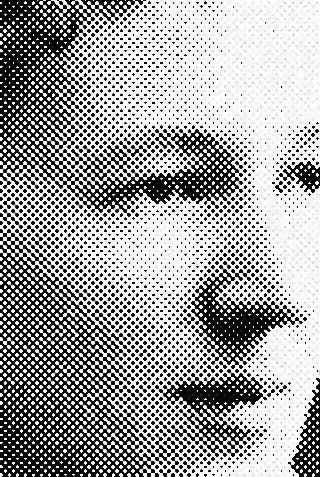

In [ ]:
img_1 = cv2.medianBlur(img3,3)
cv2_imshow(img_1)

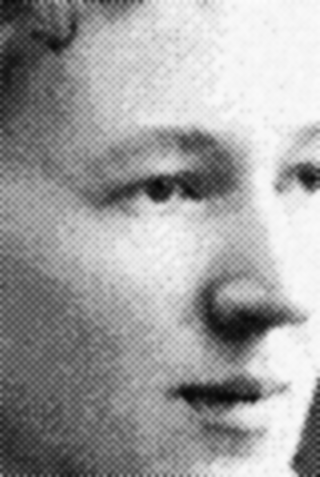

In [ ]:
img_1 = cv2.GaussianBlur(img_1, (11, 11), 0,0)
# img_2 = cv2.GaussianBlur(img_1, (5, 5), 0,0)
# img_3 = cv2.GaussianBlur(img_2, (5, 5), 0,0)
# img_4 = cv2.GaussianBlur(img_3, (5, 5), 0,0)
# img_5 = cv2.GaussianBlur(img_4, (5, 5), 0,0)
# img_cleared = cv2.GaussianBlur(img_5, (5, 5), 0,0)
cv2_imshow(img_1)

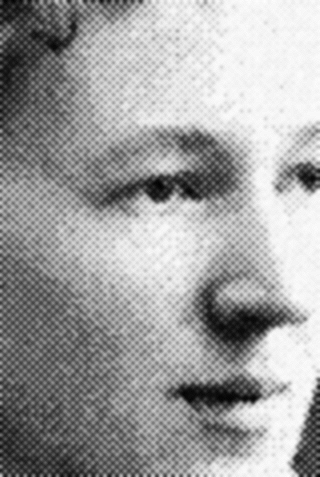

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img_1, ddepth=-1, kernel=kernel)
cv2_imshow(image_sharp)

## Restoring the Motion blurred picture


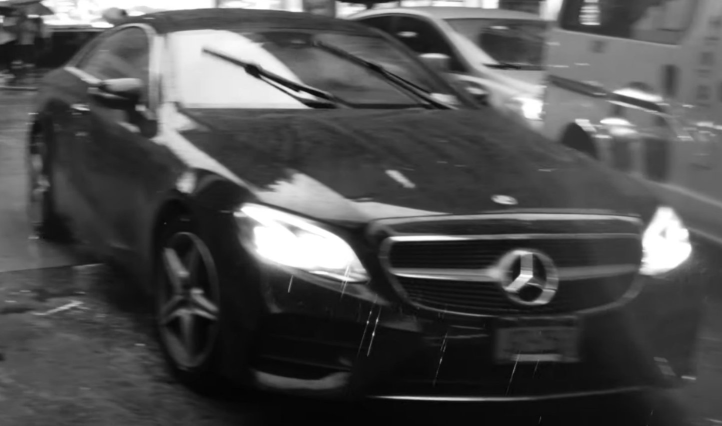

In [ ]:
img5 = cv2.imread('/content/gdrive/MyDrive/EE 610 /assignment 2/MakeNumberPlateReadable.jpg',0)
scale_percent = 50 # percent of original size
width = int(img5.shape[1] * scale_percent / 100) # width scale
height = int(img5.shape[0] * scale_percent / 100) # height scale
dim = (width, height)

img5 = cv2.resize(img5, dim, interpolation = cv2.INTER_AREA) # resizing image
cv2_imshow(img5)

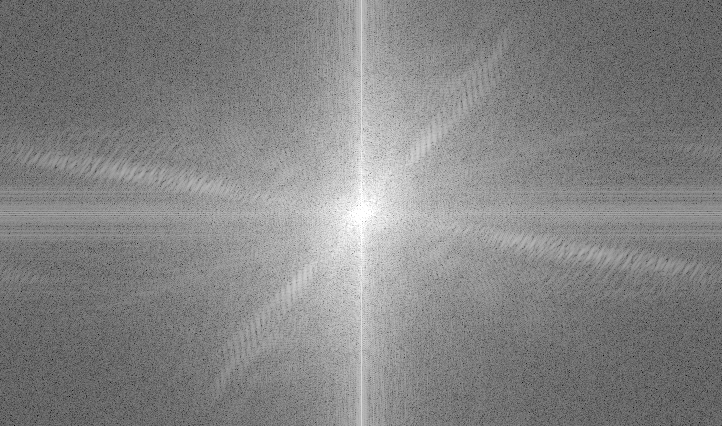

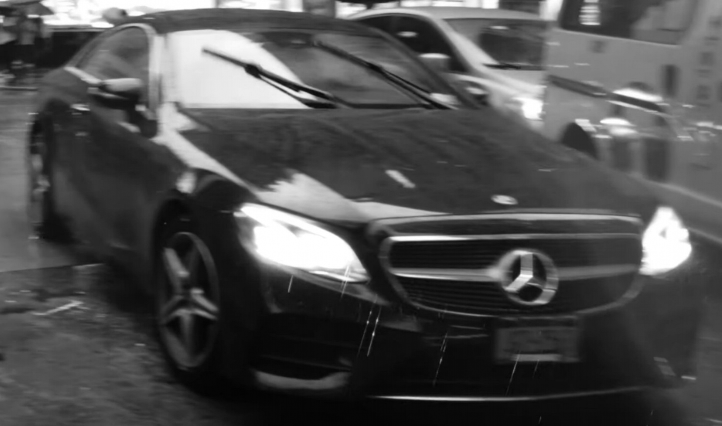

In [ ]:
f = np.fft.fft2(img5)
fshift1 = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift1))
cv2_imshow(magnitude_spectrum)
fft = np.fft.ifftshift(fshift1)
inverse_fft = np.fft.ifft2(fft)
Result = np.abs(inverse_fft)
cv2_imshow(Result)

In [ ]:
def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

In [ ]:
def gaussian_kernel(kernel_size = 3):
	h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
	h = np.dot(h, h.transpose())
	h /= np.sum(h)
	return h

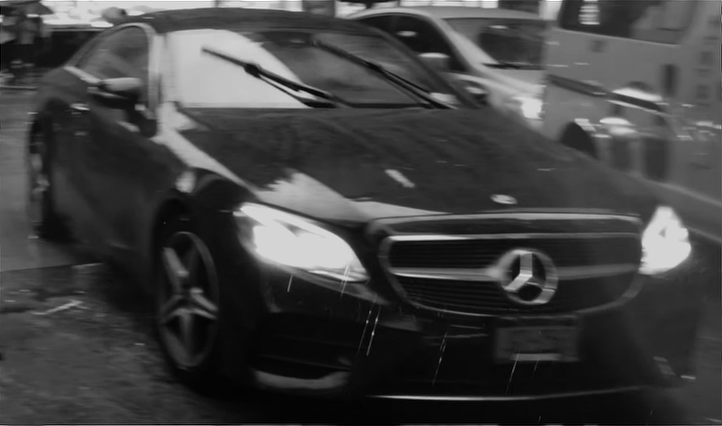

In [ ]:
from scipy.signal import gaussian, convolve2d
from numpy.fft import fft2, ifft2
kernel = gaussian_kernel(2)
filtered_img = wiener_filter(Result, kernel, K = 0.2)
cv2_imshow(filtered_img)

In [ ]:
ifbl= cv2.medianBlur(img5,3)

fbl = np.fft.fft2(ifbl)

PSF = matlab_style_gauss2D((5,5),1)

OTF = psf2otf(PSF, np.size(fbl))

OTFC = np.conj(OTF)
modOTF = OTF*OTFC

for i in range(1,np.size(OTF,1)):
    for j in range(1,np.size(OTF, 2)):
        if OTF(i, j) == 0:
             OTF(i,j) = 0.000001
        else OTF(i,j) = Otf(i,j)
return OTF(i,j)

debl = ((modOTF/(modOTF+SNR))/(OTF))*fbl;
lbed = np.fft.ifft2(debl);
cv2_imshow(lbed)


SyntaxError: ignored

In [ ]:
def psf2otf(psf, shape):
    """
    Convert point-spread function to optical transfer function.
    Compute the Fast Fourier Transform (FFT) of the point-spread
    function (PSF) array and creates the optical transfer function (OTF)
    array that is not influenced by the PSF off-centering.
    By default, the OTF array is the same size as the PSF array.
    To ensure that the OTF is not altered due to PSF off-centering, PSF2OTF
    post-pads the PSF array (down or to the right) with zeros to match
    dimensions specified in OUTSIZE, then circularly shifts the values of
    the PSF array up (or to the left) until the central pixel reaches (1,1)
    position.
    Parameters
    ----------
    psf : `numpy.ndarray`
        PSF array
    shape : int
        Output shape of the OTF array
    Returns
    -------
    otf : `numpy.ndarray`
        OTF array
    Notes
    -----
    Adapted from MATLAB psf2otf function
    """
    if np.all(psf == 0):
        return np.zeros_like(psf)

    inshape = psf.shape
    # Pad the PSF to outsize
    psf = psf #zero_pad(psf, shape, position='corner')

    # Circularly shift OTF so that the 'center' of the PSF is
    # [0,0] element of the array
    for axis, axis_size in enumerate(inshape):
        psf = np.roll(psf, -int(axis_size / 2), axis=axis)

    # Compute the OTF
    otf = np.fft.fft2(psf)

    # Estimate the rough number of operations involved in the FFT
    # and discard the PSF imaginary part if within roundoff error
    # roundoff error  = machine epsilon = sys.float_info.epsilon
    # or np.finfo().eps
    n_ops = np.sum(psf.size * np.log2(psf.shape))
    otf = np.real_if_close(otf, tol=n_ops)

    return otf

In [ ]:
import numpy as np

def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [ ]:
ifbl= cv2.medianBlur(img5,3)

fbl = np.fft.fft2(ifbl)

PSF = matlab_style_gauss2D((5,5),1)

OTF = psf2otf(PSF, np.size(fbl))

OTFC = np.conj(OTF)
modOTF = OTF*OTFC

# for i in range(1,np.size(OTF,1)):
#     for j in range(1,np.size(OTF, 2)):
#         if OTF(i, j) == 0:
#              OTF(i,j) = 0.000001
#         else: 
#             OTF(i,j) = OTF(i,j)

debl = ((modOTF/(modOTF+SNR))/(OTF))*fbl;
lbed = np.fft.ifft2(debl);
cv2_imshow(lbed)

NameError: ignored

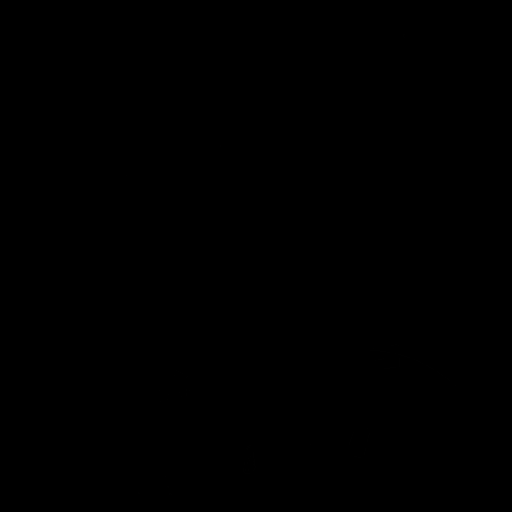

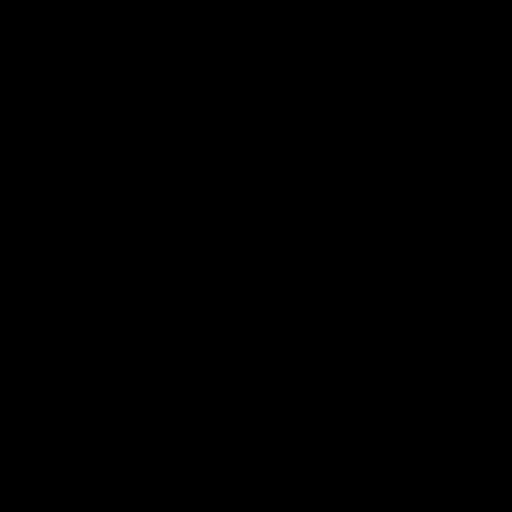

In [ ]:
# from skimage import color, data, restoration
# img = color.rgb2gray(data.astronaut())
# cv2_imshow(img)
# from scipy.signal import convolve2d
# psf = np.ones((5, 5)) / 25
# img = convolve2d(img, psf, 'same')
# rng = np.random.default_rng()
# img += 0.1 * img.std() * rng.standard_normal(img.shape)
# deconvolved_img = restoration.wiener(img, psf, 1100)
# cv2_imshow(deconvolved_img)